## Introduction.

The Strimchik online store sells computer games all over the world.


Task: to identify the patterns that determine the success of the game, which will allow you to bet on a potentially popular product and plan advertising campaigns.

The analysis uses data up to 2016 stored in the games.csv table

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Introduction." data-toc-modified-id="Introduction.-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Introduction.</a></span></li></ul></li><li><span><a href="#Step.-Explore-general-information" data-toc-modified-id="Step.-Explore-general-information-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Step. Explore general information</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Step.-Data-preprocessing" data-toc-modified-id="Step.-Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step. Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Step.-Exploratory-data-analysis" data-toc-modified-id="Step.-Exploratory-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Step. Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Number-of-released-games-in-different-years." data-toc-modified-id="Number-of-released-games-in-different-years.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Number of released games in different years.</a></span></li><li><span><a href="#Total-sales-and-distribution-of-sales-among-the-largest-platforms" data-toc-modified-id="Total-sales-and-distribution-of-sales-among-the-largest-platforms-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Total sales and distribution of sales among the largest platforms</a></span></li><li><span><a href="#Research-data-for-the-current-period" data-toc-modified-id="Research-data-for-the-current-period-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Research data for the current period</a></span></li><li><span><a href="#The-impact-of-user-reviews-and-critics-on-sales" data-toc-modified-id="The-impact-of-user-reviews-and-critics-on-sales-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>The impact of user reviews and critics on sales</a></span></li><li><span><a href="#General-distribution-of-games-by-genre.-The-most-profitable-genres." data-toc-modified-id="General-distribution-of-games-by-genre.-The-most-profitable-genres.-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>General distribution of games by genre. The most profitable genres.</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Step.-User-portrait-of-each-region" data-toc-modified-id="Step.-User-portrait-of-each-region-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step. User portrait of each region</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Step.-Hypothesis-testing." data-toc-modified-id="Step.-Hypothesis-testing.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step. Hypothesis testing.</a></span><ul class="toc-item"><li><span><a href="#First-hypothesis-about-the-average-user-ratings-of-the-Xbox-One-and-PC-platforms" data-toc-modified-id="First-hypothesis-about-the-average-user-ratings-of-the-Xbox-One-and-PC-platforms-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>First hypothesis about the average user ratings of the Xbox One and PC platforms</a></span></li><li><span><a href="#Second-hypothesis-about-the-average-user-ratings-of-Action-and-Sports-genres" data-toc-modified-id="Second-hypothesis-about-the-average-user-ratings-of-Action-and-Sports-genres-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Second hypothesis about the average user ratings of Action and Sports genres</a></span></li></ul></li><li><span><a href="#Step.-Final-conclusion" data-toc-modified-id="Step.-Final-conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Step. Final conclusion</a></span></li></ul></div>

# Step. Explore general information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sb

In [2]:
pd.set_option("display.max_rows", 30)

In [3]:
import os
pth1 = '/Users/maksimkeller/Desktop/Jupyter/project01/games.csv'
pth2 = '/datasets/games.csv'
if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print("Check if the path to the dataset is correct")

In [4]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1554,Road Rash,PS,1995.0,Racing,0.71,0.48,0.00,0.08,NaN,NaN,NaN
4568,Ben 10 Alien Force: Vilgax Attacks,DS,2009.0,Action,0.22,0.16,0.00,0.04,NaN,tbd,E
16287,Metal Slug Anthology,PS2,2007.0,Shooter,0.00,0.00,0.01,0.00,80.0,8.1,T
130,The Elder Scrolls V: Skyrim,PS3,2011.0,Role-Playing,2.55,2.60,0.25,1.00,92.0,6.4,M
14296,SBK 2011: FIM Superbike World Championship,PC,2011.0,Racing,0.00,0.03,0.00,0.01,NaN,NaN,NaN
16498,"Sakigake!! Otokojuku - Nihon yo, Kore ga Otoko...",PS3,2014.0,Fighting,0.00,0.00,0.01,0.00,NaN,NaN,NaN
372,Donkey Kong Country 3: Dixie Kong's Double Tro...,SNES,1996.0,Platform,1.17,0.50,1.75,0.08,NaN,NaN,NaN
10451,Gallop Racer 2006,PS2,2005.0,Sports,0.02,0.02,0.06,0.01,69.0,8.3,E
6425,Gundam Breaker,PS3,2013.0,Action,0.00,0.00,0.26,0.00,NaN,NaN,NaN
14625,Harley-Davidson: Road Trip,Wii,2010.0,Racing,0.03,0.00,0.00,0.00,NaN,tbd,E


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Conclusion

Games.csv table is used for data analysis

It contains 11 columns and 16715 rows.

    Name - the name of the game, has two gaps.
    Platform - platform, has no passes.
    Year_of_Release is the year of release, has 269 gaps.
    Genre - game genre, has two passes.
    NA_sales - Sales in North America (millions of copies sold), no passes.
    EU_sales - sales in Europe (millions of copies sold), no passes.
    JP_sales - sales in Japan (millions of copies sold), no passes.
    Other_sales - sales in other countries (millions of copies sold)
    Critic_Score - Critics score (max 100), has 6462 passes.
    User_Score - user score (maximum 10), has 6701 passes.
    Rating - rating from the organization, has 6766 passes.

Note that in addition to the missing values, the column names need to be corrected to bring them to generally accepted standards.

# Step. Data preprocessing

In [6]:
data = data.rename(
columns={
'Name' : 'name',
'Platform' : 'platform',
'Year_of_Release' : 'year_of_release',
'Genre' : 'genre',
'NA_sales' : 'na_sales',
'Day' : 'day',
'EU_sales' : 'eu_sales',
'JP_sales' : 'jp_sales',
'Other_sales' : 'other_sales',
'Critic_Score' : 'critic_score',
'User_Score' : 'user_score',
'Rating' : 'rating'}
)

In [7]:
data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9432,Rumble Roses XX,X360,2006.0,Fighting,0.07,0.01,0.04,0.01,62.0,6.6,M
9659,High Velocity: Mountain Racing Challenge,SAT,1995.0,Racing,0.00,0.00,0.12,0.00,NaN,NaN,NaN
14196,Wangan Midnight,PS3,2007.0,Racing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1452,Marvel vs. Capcom 3: Fate of Two Worlds,PS3,2011.0,Fighting,0.81,0.28,0.11,0.14,84.0,7.3,T
14477,Summer Athletics: The Ultimate Challenge,X360,2008.0,Sports,0.02,0.01,0.00,0.00,48.0,tbd,E
4255,WWE SmackDown vs. Raw 2011,Wii,2010.0,Fighting,0.29,0.13,0.00,0.04,72.0,tbd,T
9628,Yu-Gi-Oh! GX: Tag Force,PSP,2006.0,Strategy,0.09,0.02,0.00,0.02,NaN,NaN,NaN
5580,OverBlood,PS,1996.0,Action,0.05,0.04,0.21,0.02,NaN,NaN,NaN
10332,Cats & Dogs: The Revenge of Kitty Galore,DS,2010.0,Action,0.10,0.00,0.00,0.01,NaN,NaN,NaN
674,Dragon Warrior Monsters,GB,1998.0,Role-Playing,0.00,0.00,2.34,0.01,NaN,NaN,NaN


In [9]:
# Let's convert the values in the 'year_of_release' column, 
# indicating the year the game was released, to an integer type.
data['year_of_release'] = data['year_of_release'].fillna(0).astype('int')

In [10]:
# add a column with total revenue for all regions
data.insert(4,'total_sales', data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales'])

In [12]:
# fill in the release year for games where the total number of copies sold is more than 1 million units.
top_sales_no_year = {
'name': ['Madden NFL 2004', 'FIFA Soccer 2004','LEGO Batman: The Videogame','wwe Smackdown vs. Raw 2006',
        'Rock Band','Frogger\'s Adventures: Temple of the Frog','LEGO Indiana Jones: The Original Adventures',
        'Call of Duty 3', 'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure',
        'LEGO Batman: The Videogame', 'Combat', 'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
        'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver', 'Donkey Kong Land III'],
'year_of_release' : ['2003', '2003', '2008', '2005', '2007', '2001', '2008', '2006', '2010', 
                         '1998', '1979', '2008', '1977', '2011', '2002', '2002', '1999', '1997']
}
df = pd.DataFrame(top_sales_no_year)
df['year_of_release'] = df['year_of_release'].astype('int')

In [13]:
for i in range(len(df['name'])):
    data.loc[data['name'] == df.loc[i,'name'], 'year_of_release'] =  df.loc[i,'year_of_release']
data['year_of_release'] = data['year_of_release'].astype('int')

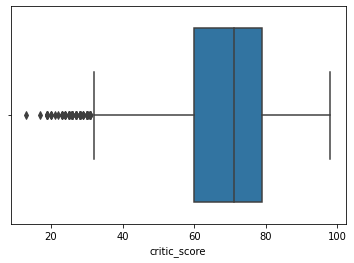

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [14]:
# got that games with high critical acclaim 
# (higher than 75% of dataframe games) that don't have a date: 22
sb.boxplot( x=data['critic_score'])
plt.show()
data['critic_score'].describe()

In [15]:
top_critic_score = {
    'name': ['Suikoden III', 
            'Metal Gear Solid 2: Substance', 
            'Advance Wars: Days of Ruin', 
            'NASCAR: Dirt to Daytona',
            'Madden NFL 2002',
            'Def Jam: Fight for NY', 
            'NBA Street Vol. 2', 
            'The Chronicles of Riddick: Escape from Butcher Bay',
            'NBA Live 2003', 
            'Tomb Raider (2013)', 
            'Final Fantasy XI', 
            'Star Wars Jedi Knight II: Jedi Outcast',
            'Unreal Championship 2: The Liandri Conflict', 
            'BioShock 2', 
            'Trauma Team', 
            'Street Fighter IV', 
            'Super Puzzle Fighter II',
            'Drill Dozer', 
            'GRID', 
            'NHL Hitz Pro', 
            'Homeworld Remastered Collection'],
    'year_of_release' : ['2002', '2001', '2008', '2002', '2001', '2004', '2003', '2004', '2002', '2013',
                        '2002', '2002', '2005', '2010', '2010', '2008', '2000','2005', '2008', '2003','2015']
}
df = pd.DataFrame(top_critic_score)
df['year_of_release'] = df['year_of_release'].astype('int')

In [16]:
# fill in the gaps in the release date of games with high ratings
for i in range(len(df['name'])):
    data.loc[data['name'] == df.loc[i,'name'], 'year_of_release'] =  df.loc[i,'year_of_release']
data['year_of_release'] = data['year_of_release'].astype('int')

In [17]:
# Make tbd values NaN
data.loc[(data['user_score'] == 'tbd' ), 'user_score'] = np.NaN

data['user_score'] = data['user_score'].astype('float')

In [19]:
top_users_score = {
    'name': [
        'Yakuza 4', 'The Lord of the Rings: War in the North', 'MLB SlugFest 20-03', 'Shaun White Snowboarding',
        'NHL Slapshot', 'Harvest Moon: Save the Homeland', 'Robert Ludlum\'s The Bourne Conspiracy',
        'Tropico 4', 'Singularity', 'All-Star Baseball 2005', 'Disgaea 3: Absence of Detention', 'Gun',
        'Mega Man X Collection', 'Singularity', 'Tribes: Aerial Assault', 'Yu Yu Hakusho: Dark Tournament',
        'Backbreaker', 'Twisted Metal: Small Brawl', 'Otomedius Excellent', 'Splatterhouse', 'Alone in the Dark: The New Nightmare',
        'eJay Clubworld', 'All-Star Baseball 2005', 'Bejeweled 3', 'Rocksmith', 'Star Trek: Conquest', 'Port Royale 3',
        'Tour de France 2011', 'Sabre Wulf', 'Virtua Quest'
    ],
    'year_of_release' : [
        '2010', '2011', '2002', '2008', '2010', '2001', '2008', '2011', '2010', '2004', '2008', '2005', '2006',
        '2010', '2002', '2004', '2010', '2001', '2011', '1988', '2001', '1997', '2004', '2010', '2013', '2007',
        '2012', '2010', '1984', '2004'
    ]
}
df = pd.DataFrame(top_users_score)
df['year_of_release'] = df['year_of_release'].astype('int')

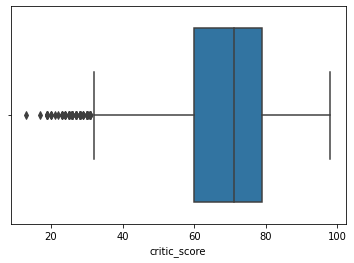

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [20]:
sb.boxplot( x=data['critic_score'])
#plt.xlim(0, 1)
plt.show()
data['critic_score'].describe()

In [21]:
# two games with no title, no genre, no ratings.
# we know that both games have a release year of 1993, i.e. over 20 years. We will remove them from the study.
data.loc[(data['genre'].isna())]

,name,platform,year_of_release,genre,total_sales,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,2.39,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.03,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [22]:
# note that "Strongest Tokyo University Shogi DS" was not released on the DS platform in 1985, 
# because platform was released in 1994.
data = data[data['name'] != 'Strongest Tokyo University Shogi DS']

In [23]:
# stub
data['rating'] = data['rating'].fillna('other')

In [24]:
data = data.loc[data['name'].isna()== False]
data_years = data.loc[data['year_of_release'] != 0]

In [25]:
data = data_years

## Conclusion

At the data preprocessing step, the column names were standardized using the rename() method.

Then the values ​​in the 'year_of_release' column, representing the year the game was released, were cast to an integer type. Because the year the game was released is an integer.

The values ​​in the 'user_score' column have been cast to the 'float' type because user ratings are set on a ten-point system with an accuracy of tenths.
Notice the value: 'tbd' in the user rating column. This is an abbreviation for "to be determined" and means "not yet determined". Therefore, it is not possible to determine the rating of players for these games and all values ​​of 'tbd' have been changed to None.

A column has been added with the total revenue for all regions represented 'total_sales'.

The gaps in the years of publication of the games were filled in, the year of release was obtained from open sources.
Games with a total revenue of more than 1 million, with a critic score of more than 80 or a user rating of more than 7.4 were selected to fill in the gaps

There are two games in the table that have their name and genre omitted. Note that these games were released over 20 years ago. These games will be removed from the study.

Note that the gaps remained only in the last three columns - the ratings of critics, users, rating.
The games are rated by the Entertainment Software Rating Board (ESRB), formed in the United States in 1994 for games sold in the US and Canadian markets. Less than 0.6% of games have ratings but no rating. It is important to see that the rating is missing for some platforms entirely, for example the rating is missing for the NES platform which was popular in the 80's, which obviously predates the ESRB.

In [26]:
# let's check unique names in columns
print('name', data.name.sort_values().unique())
print('platform', data.platform.sort_values().unique())
print('year_of_release', data.year_of_release.sort_values().unique())
print('year_of_release: кол-во 0', data.year_of_release[data.year_of_release == 0].count())
print('genre', data.genre.sort_values().unique())
print('critic_score', data.critic_score.sort_values().unique())
print('critic_score: кол-во NaN, доля',data.critic_score.isna().sum(), data.critic_score.isna().sum()/len(data))
print('user_score', data.user_score.sort_values().unique())
print('user_score: кол-во 0', data.user_score[data.user_score == 0].count())
print('user_score: кол-во NaN, доля',data.user_score.isna().sum(), data.user_score.isna().sum()/len(data))
print('rating', data.rating.sort_values().unique())
print('rating: кол-во NaN, доля',data.rating.isna().sum(), data.rating.isna().sum()/len(data))

name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa en colores!']
platform ['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']
year_of_release [1977 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
year_of_release: кол-во 0 0
genre ['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']
critic_score [13. 17. 19. 20. 21. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78

# Step. Exploratory data analysis

This section will explore the following questions:
- how many games were produced in different years. Is data for all periods important?
- How did sales change by platform?
- What is the characteristic period for new platforms to appear and old ones to disappear?
- which platforms are leading in sales, growing or falling?
- which platforms are potentially the most profitable?
- how do user reviews and critics influence sales within one popular platform?
What is the correlation between reviews and sales?
- What is the general distribution of games by genre?
- what can be said about the most profitable genres?
- Do genres with high and low sales stand out?

## Number of released games in different years.

The graph below shows the number of games released in each year from 1977 to 2016 for each platform.

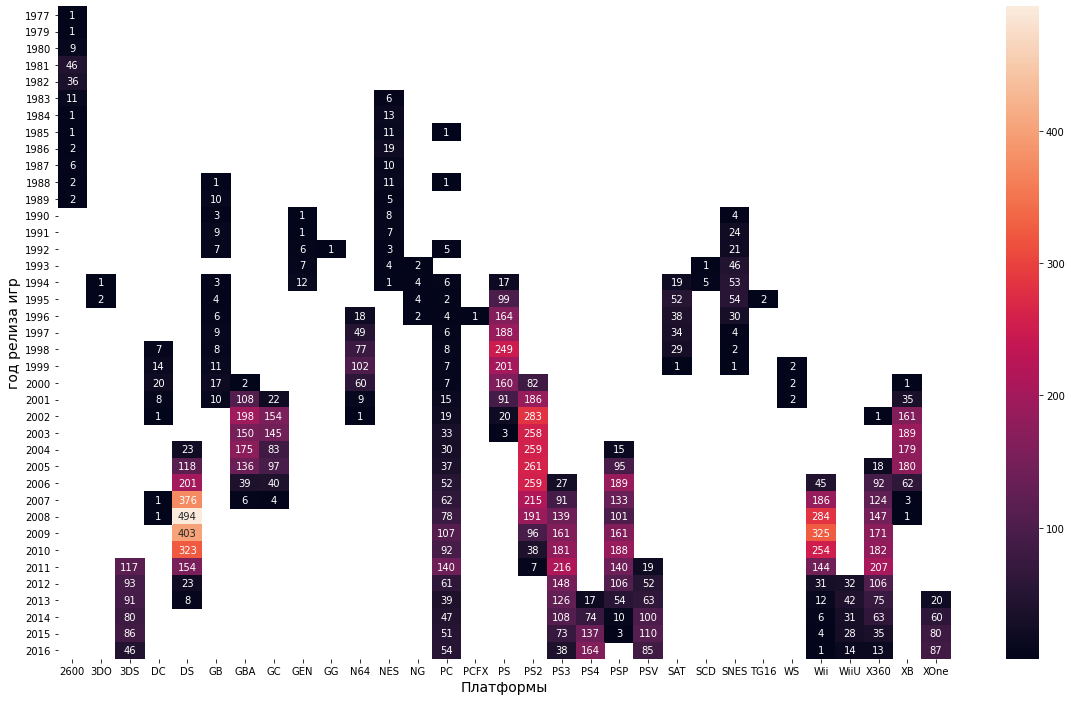

In [29]:
data_heat = data_years.pivot_table(index = 'year_of_release',columns = "platform", values= 'name', aggfunc= 'count')

ax = plt.subplots(figsize=(20, 12))
ax = sb.heatmap(data_heat, annot=True, fmt=".0f")
plt.ylabel('год релиза игр', size=14)
plt.xlabel('Платформы', size=14)
plt.show()

The study of this graph allows us to conclude that some platforms are not sufficiently representative (so according to available data, only one game was released on the Sega Game Gear (GG) platform in 1992, which is not true, because the gaming platform was released in 1990 in Japan and according to Wikipedia, more than 200 games have been released).
However, the available data allows us to form a fairly accurate idea of ​​the years when the platforms were popular.

To determine the platforms with, in the future, the greatest profit, we will build the following hitmap, showing the total revenue by year.

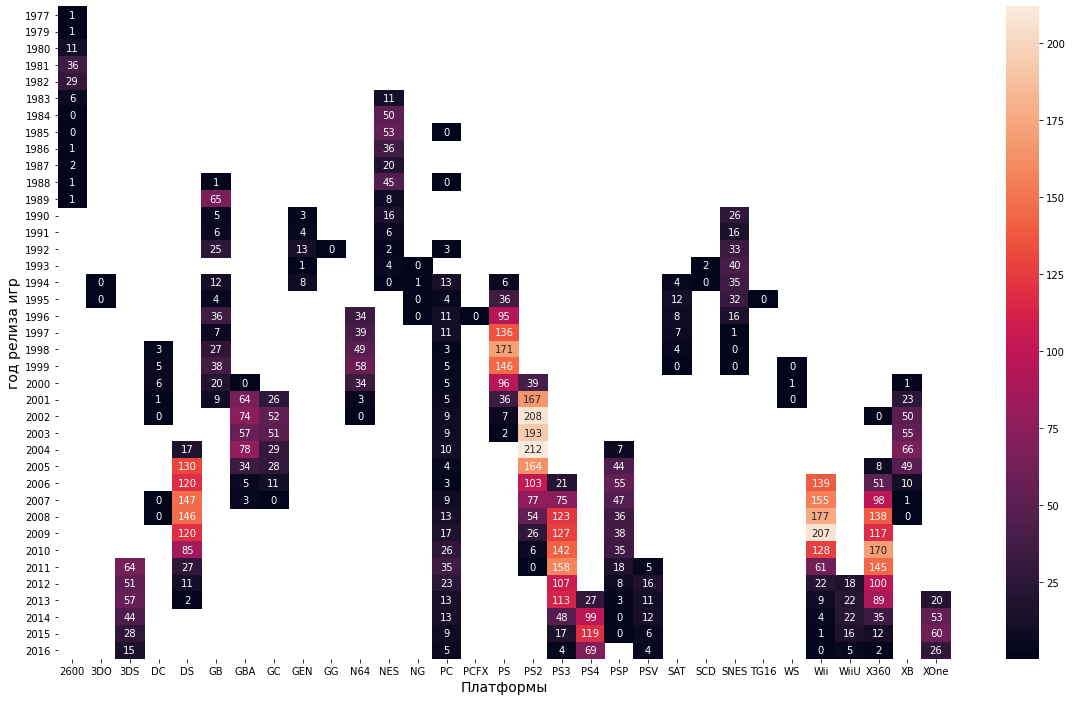

In [30]:
data_heat = data_years.pivot_table(index = 'year_of_release',columns = "platform", values= 'total_sales', aggfunc= 'sum')

ax = plt.subplots(figsize=(20, 12))
ax = sb.heatmap(data_heat, annot=True, fmt=".0f")
plt.ylabel('год релиза игр', size=14)
plt.xlabel('Платформы', size=14)
plt.show()

This graph shows the number of millions of games sold in each year from 1977 to 2016 for each of the platforms represented.

It can be noted that before the advent of the PS game console, total sales were insignificant, however, with the advent of the Play Station console, more and more consoles appear, whose total sales exceed hundreds of millions of copies. Note that values ​​prior to 1994 (the year the original Play Station was released) are less relevant for this study.

On the chart above, it is possible to evaluate how sales have changed by platform. Which years accounted for the increase in sales, and which - the number of copies sold was declining.

## Total sales and distribution of sales among the largest platforms

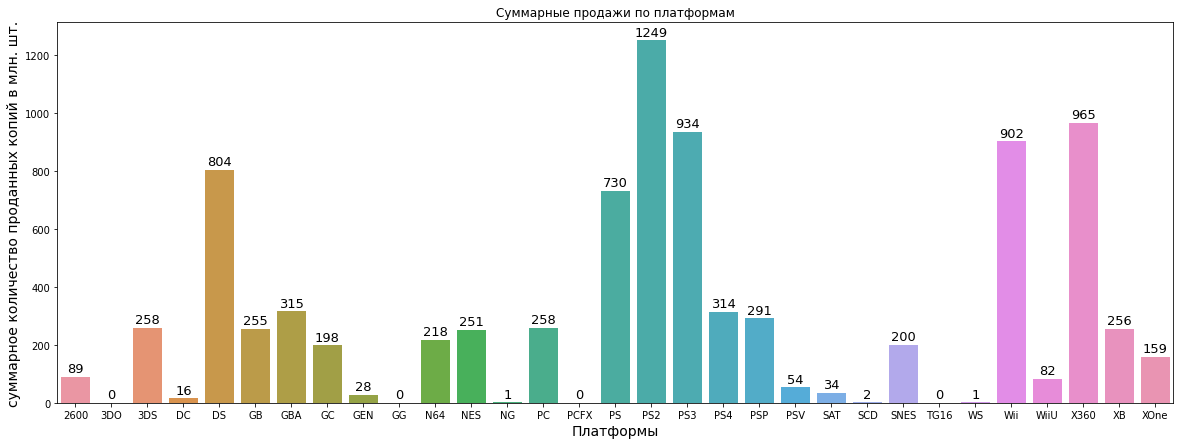

In [31]:
data_bar_sales = data.pivot_table(columns = 'platform', values= 'total_sales', aggfunc= 'sum')
plots = plt.subplots(figsize=(20, 7))
plots = sb.barplot(data=data_bar_sales)
plots.set_title('Суммарные продажи по платформам')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.ylabel('суммарное количество проданных копий в млн. шт.', size=14)
plt.xlabel('Платформы', size=14)
plt.show()

Based on the presented graph, we can conclude that the following platforms showed the largest total sales:
- Nintendo DS (DS), 806 million copies sold.
- Play Station (PS), 731 million copies sold.
- Play Station 2 (PS2), 1256 million copies sold.
- Play Station 3 (PS3), 940 million copies sold.
- Wii, 908 million copies sold.
- Xbox 360 (X360), 971 million sold.

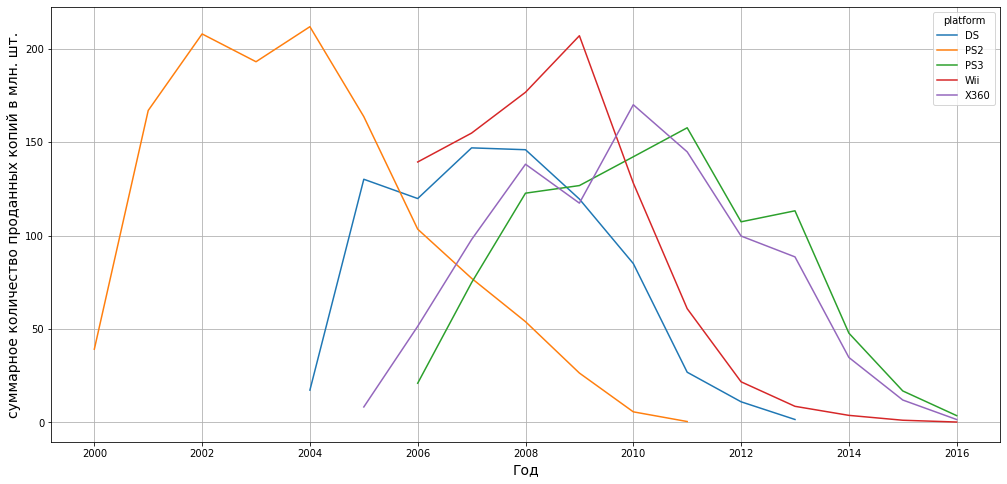

In [32]:
data_popular_platforms = data_years.loc[(data_years['platform'] == 'DS') |
                                       (data_years['platform'] == 'PS2') |
                                       (data_years['platform'] == 'PS3') |
                                       (data_years['platform'] == 'Wii') |
                                       (data_years['platform'] == 'X360')]
data_bar = data_popular_platforms.pivot_table(index = 'year_of_release', columns = "platform", values= 'total_sales', aggfunc= 'sum')
data_bar.plot(figsize=(17, 8),grid=True)
plt.ylabel('суммарное количество проданных копий в млн. шт.', size=14)
plt.xlabel('Год', size=14)
plt.show()

This graph shows the distribution of the number of games sold in million copies for the five largest gaming platforms.

In [33]:
df_lifetime = data_years.pivot_table(index='platform', aggfunc = {'year_of_release': ['min','max']}).reset_index()
df_lifetime['years_of_life'] = 1 + df_lifetime[('year_of_release','max' )] - df_lifetime[('year_of_release', 'min')]
df_popular_lifetime = data_popular_platforms.pivot_table(index='platform', aggfunc = {'year_of_release': ['min','max']}).reset_index()
df_popular_lifetime['years_of_life'] = 1 + df_popular_lifetime[('year_of_release','max' )] - df_popular_lifetime[('year_of_release', 'min')]
print('Среднее, медиана для всех игровых платформ')
display(df_lifetime['years_of_life'].describe())
print('Среднее, медиана для пяти крупнейших игровых платформ')
display(df_popular_lifetime['years_of_life'].describe())


Среднее, медиана для всех игровых платформ


count    31.000000
mean      8.193548
std       6.046593
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      32.000000
Name: years_of_life, dtype: float64

Среднее, медиана для пяти крупнейших игровых платформ


count     5.000000
mean     11.800000
std       1.923538
min      10.000000
25%      11.000000
50%      11.000000
75%      12.000000
max      15.000000
Name: years_of_life, dtype: float64

Based on the data presented above, we can conclude that the average lifespan of a gaming platform is about 11 years.

Whereas gaps in the number of released games for some platforms have been determined, that the general list represents platforms for which the life cycle has not come to an end. It can be assumed that the data may be distorted. For a more correct definition of the life cycle of platforms, the median value for the most popular platforms will be used. Because In the sales distribution chart above, you can see that in 2016 the number of copies sold tends to zero.

## Research data for the current period

Earlier in the study, it was said that after the release of the original Play Station in 1994, sales began to grow and exceed the mark of 100 million copies. However, for the most correct determination of the current period and forecasting for 2017, one should refer to the statistics obtained during the study of the most popular platforms.

Earlier it was noted that the average life cycle of platforms is about 11 years. We will consider three years as the current period. At the same time, we will remove from consideration the platforms DC, GBA, GC, XB, DS, PS2, PSP, which have lost their relevance beyond the period designated as current and, as a result, are not of interest in this study.
Next, we will build a hitmap of the number of games sold by years over a ten-year period, as well as their distribution schedule. So it will be possible to understand the dynamics of the development of relevant platforms.

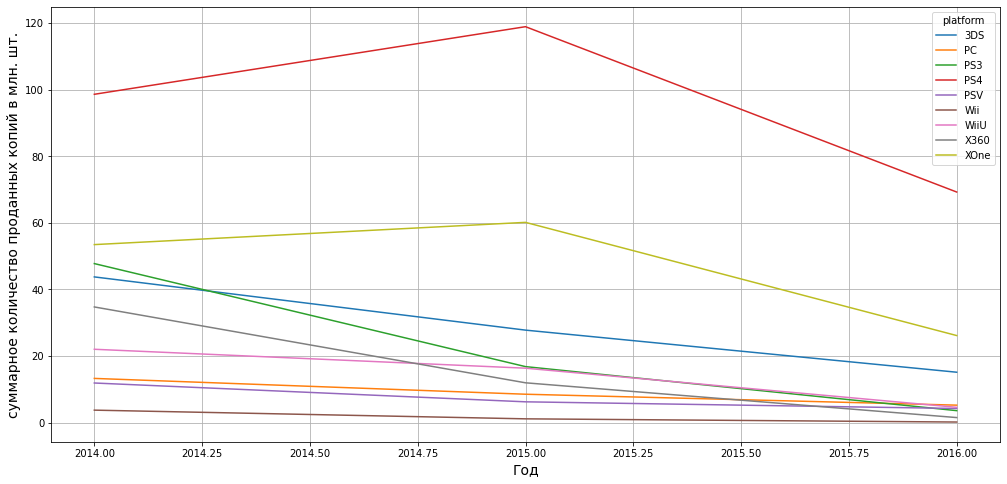

In [35]:
data_actual_platforms = data_years.loc[(data_years['year_of_release'] >= 2014) &
                                       (data_years['platform'] != 'GBA') &
                                       (data_years['platform'] != 'DC') &
                                       (data_years['platform'] != 'GC') &
                                       (data_years['platform'] != 'XB') &
                                       (data_years['platform'] != 'DS') &
                                       (data_years['platform'] != 'PS2') &
                                       (data_years['platform'] != 'PSP') 
                                      ]
data_bar = data_actual_platforms.pivot_table(index = 'year_of_release', columns = "platform", values= 'total_sales', aggfunc= 'sum')
data_bar.plot(figsize=(17, 8),grid=True)
plt.ylabel('суммарное количество проданных копий в млн. шт.', size=14)
plt.xlabel('Год', size=14)
plt.show()

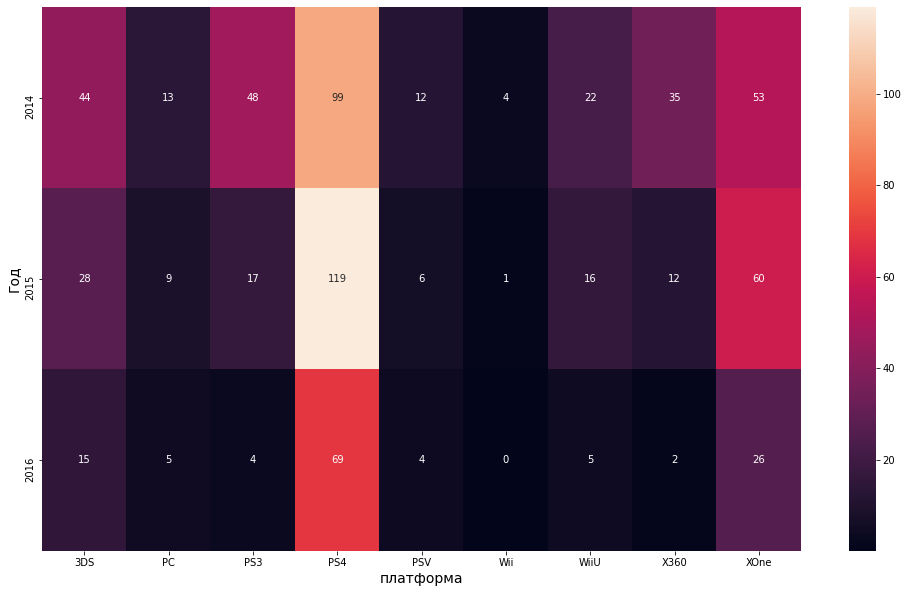

In [37]:
data_heat = data_actual_platforms.pivot_table(index = 'year_of_release',columns = "platform", values= 'total_sales', aggfunc= 'sum')

ax = plt.subplots(figsize=(17, 10))
ax = sb.heatmap(data_heat, annot=True, fmt=".0f")
plt.xlabel('платформа', size=14)
plt.ylabel('Год', size=14)
plt.show()

Based on the data presented, we can conclude that the most promising, in terms of the possible number of games sold, are such platforms as:
-PS4
- Xbox one
- 3DS

Separately, it is worth noting the PC, because. this platform has shown stable results over the years and the Nintendo 3DS is a portable gaming platform that replaced the outdated Nintendo DS and showed a consistently high level of sales for several years.

At the same time, it is obvious that the peak of sales for such platforms as PS3 (PS2), Wii, Xbox360 has passed and one should not expect a surge in sales for these platforms.

Platforms such as PSP, PSV, WiiU have not been able to show a high level of sales at the peak and it is clear that sales will continue to fall.

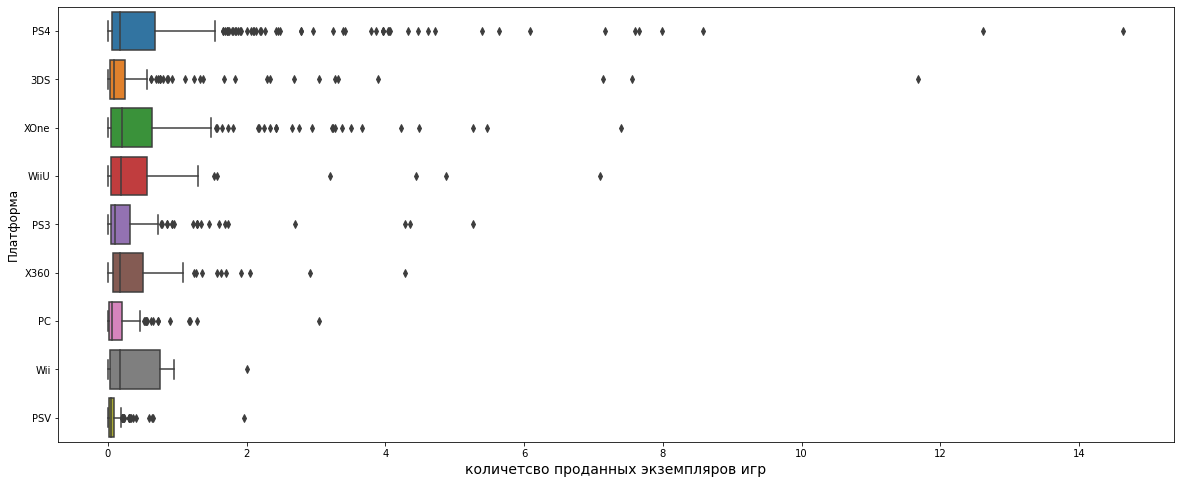

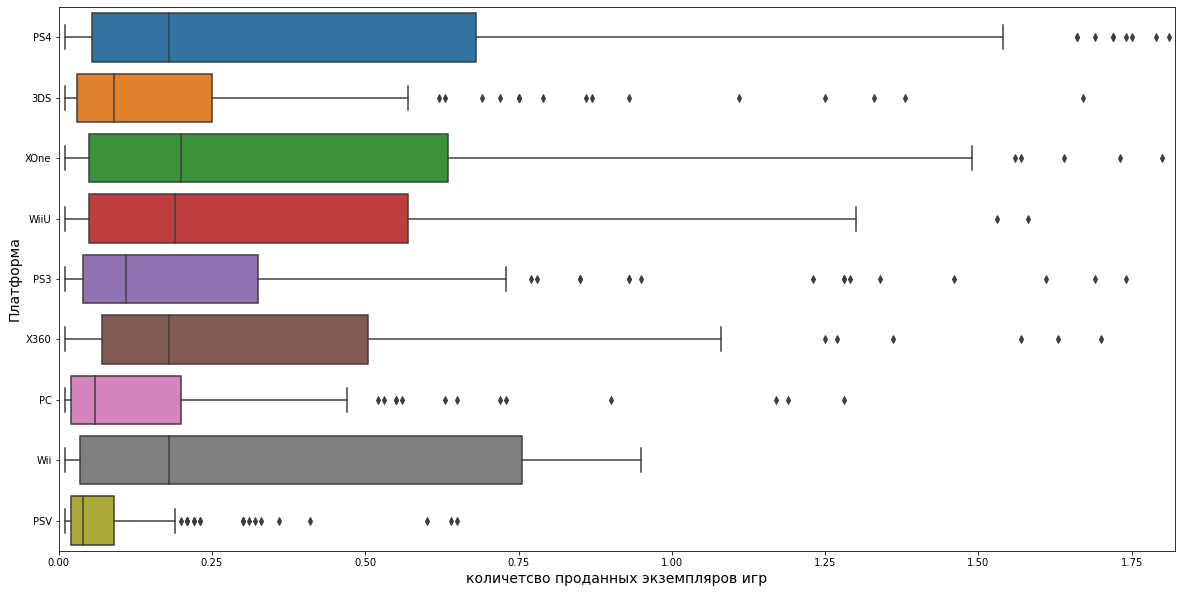

In [38]:
axx = plt.subplots(figsize=(20, 8))
axx = sb.boxplot( y=data_actual_platforms['platform'],x= data_actual_platforms['total_sales'], orient='h')
plt.ylabel('Платформа', size=12)
plt.xlabel('количетсво проданных экземпляров игр', size=14)
plt.show()

ax = plt.subplots(figsize=(20, 10))
ax = sb.boxplot( y=data_actual_platforms['platform'],x= data_actual_platforms['total_sales'], orient='h')
ax = plt.xlim(0, 1.82)
plt.ylabel('Платформа', size=14)
plt.xlabel('количетсво проданных экземпляров игр', size=14)
plt.show()

These box plots represent the number of games sold.
Based on the data obtained, we can note that the highest median values ​​(meaning that, on average, games on these platforms are sold in more copies) are higher for such platforms as: Xbox 360 and PS3.

At the same time, it is worth noting the PS4 platform, whose right interquartile range exceeds 1.6 million units, which may indicate that, despite the lower median value of the number of copies sold than the Xbox 360 and PS3, however, the number of games sold in bulk is high.

Separately, it is worth highlighting the Wii platform, for which the interquartile range is not so large, but there are unique values ​​that significantly exceed those of other games.

## The impact of user reviews and critics on sales

See how sales within one popular platform are impacted by user and critic reviews.
Plot a scatterplot and calculate the correlation between reviews and sales.
Formulate conclusions.
Correlate the findings with game sales on other platforms.
Look at the overall distribution of games by genre.
What about the most profitable genres?
Do genres with high and low sales stand out?

In [39]:
data_ps4 = data_actual_platforms[data_actual_platforms['platform']== 'PS4']

,critic_score,total_sales,user_score
critic_score,1.000000,0.402661,0.546434
total_sales,0.402661,1.000000,-0.040132
user_score,0.546434,-0.040132,1.000000


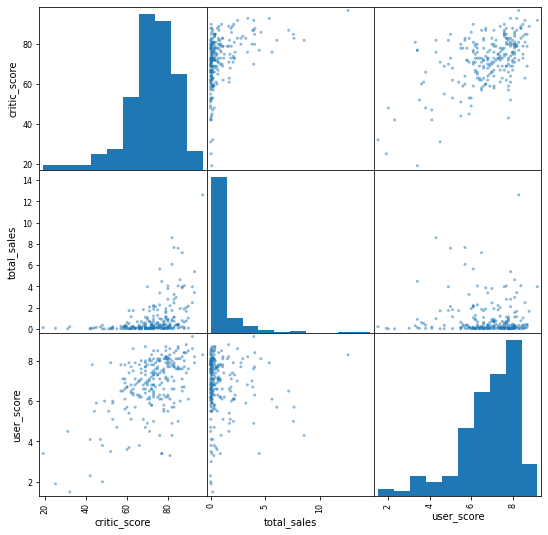

In [40]:
data_scatter = data_ps4.pivot_table(
    index = 'name',
    values = ['total_sales','critic_score','user_score'], 
    #values= ['total_sales'], 
    aggfunc= 'mean')
display(data_scatter.corr())

pd.plotting.scatter_matrix(data_scatter, figsize=(9, 9))
plt.show()

Using the above scatterplot matrix, you can explore the relationship between critics' ratings, user ratings, and total sales.
Note that the relationship between critics' ratings and user ratings can be characterized as medium (since it ranges from 0.5 to 0.69). At the same time, the relationship between the number of copies sold and critics' ratings is moderate, although the relationship between user ratings and the number of copies are very weak.
It can be seen that although the relationship between ratings (more by critics and less by users) and sales is not strong, it can be noted that games with high sales do not have low ratings.

The data presented above was obtained based on the values ​​for the PS4 platform, consider a similar chart matrix for the Xbox 360 platform.

,critic_score,total_sales,user_score
critic_score,1.000000,0.402661,0.546434
total_sales,0.402661,1.000000,-0.040132
user_score,0.546434,-0.040132,1.000000


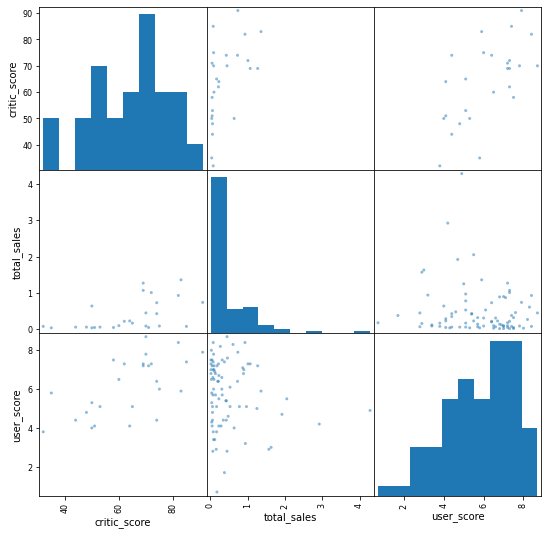

,critic_score,total_sales,user_score
critic_score,1.000000,0.402661,0.546434
total_sales,0.402661,1.000000,-0.040132
user_score,0.546434,-0.040132,1.000000


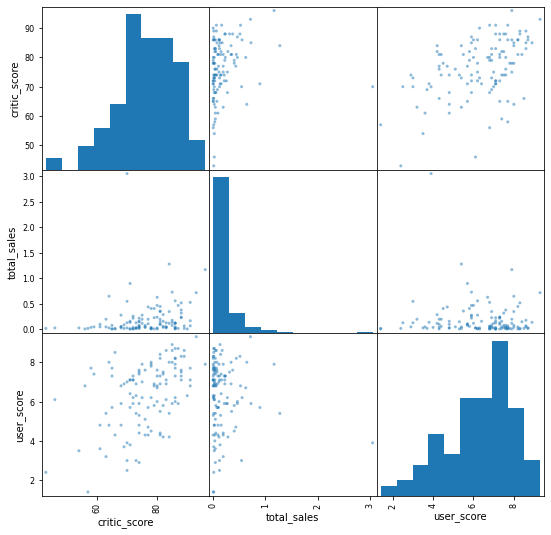

,critic_score,total_sales,user_score
critic_score,1.000000,0.402661,0.546434
total_sales,0.402661,1.000000,-0.040132
user_score,0.546434,-0.040132,1.000000


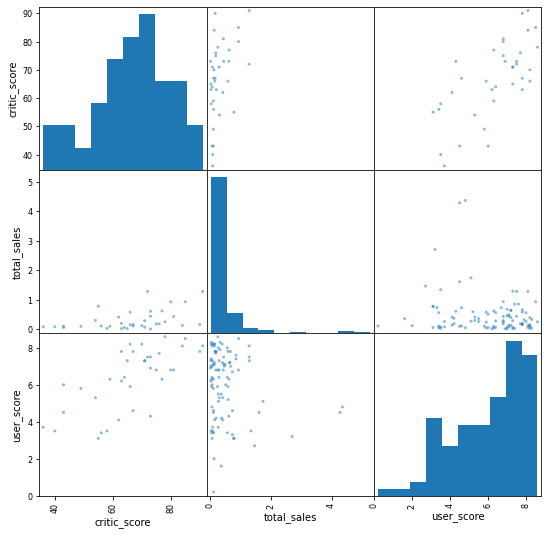

,critic_score,total_sales,user_score
critic_score,1.000000,0.402661,0.546434
total_sales,0.402661,1.000000,-0.040132
user_score,0.546434,-0.040132,1.000000


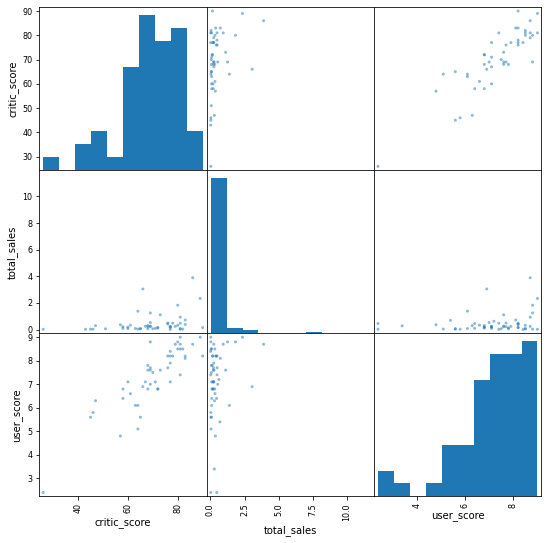

,critic_score,total_sales,user_score
critic_score,1.000000,0.402661,0.546434
total_sales,0.402661,1.000000,-0.040132
user_score,0.546434,-0.040132,1.000000


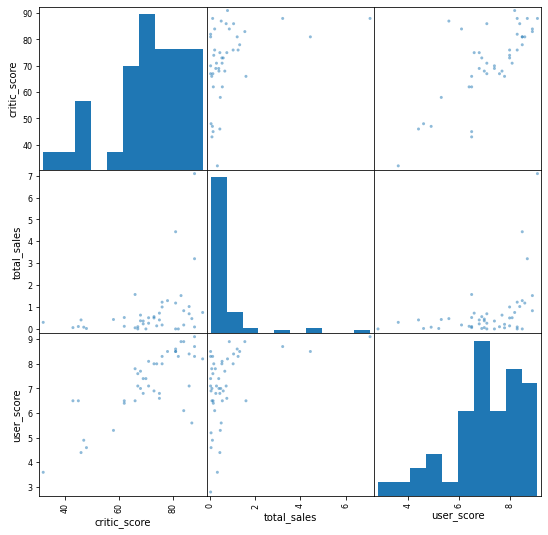

In [41]:
pltf = ['X360', 'PC','PS3','3DS','WiiU']

for name in pltf:
    data_1 = data_actual_platforms[data_actual_platforms['platform']== name]

    data_scatter_1 = data_1.pivot_table(
        index = 'name',
        values = ['total_sales','critic_score','user_score'], 
        aggfunc= 'mean')
    display(data_scatter.corr())

    pd.plotting.scatter_matrix(data_scatter_1, figsize=(9, 9))
    plt.show()

It can be seen that although the values have changed, however, all the conclusions that were obtained above do not lose their relevance.

## General distribution of games by genre. The most profitable genres.

Let's study the general distribution of games by genre.

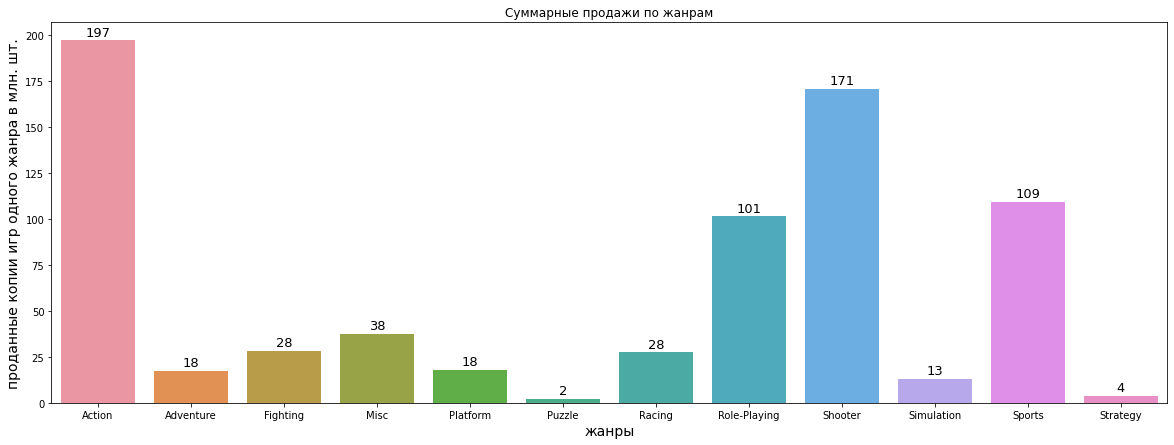

In [42]:
data_bar_genres = data_actual_platforms.pivot_table(columns = 'genre', values= 'total_sales', aggfunc= 'sum')
plots = plt.subplots(figsize=(20, 7))
plots = sb.barplot(data=data_bar_genres)
plots.set_title('Суммарные продажи по жанрам')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.ylabel('проданные копии игр одного жанра в млн. шт.', size=14)
plt.xlabel('жанры', size=14)
plt.show()

In [43]:
data_actual_platforms.pivot_table(columns = 'genre', values= 'total_sales', aggfunc= 'median')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
total_sales,0.09,0.03,0.125,0.09,0.14,0.045,0.09,0.11,0.515,0.1,0.19,0.055


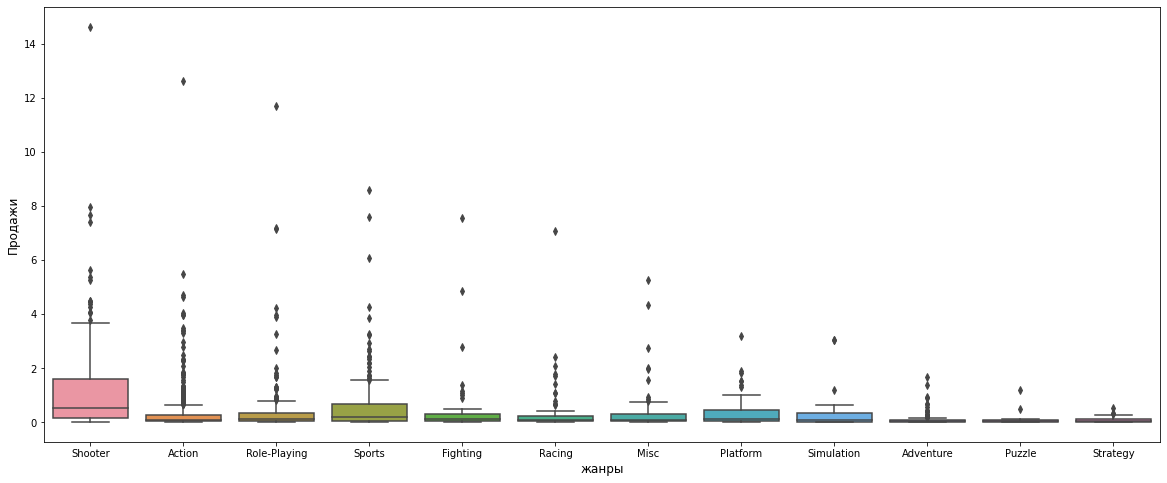

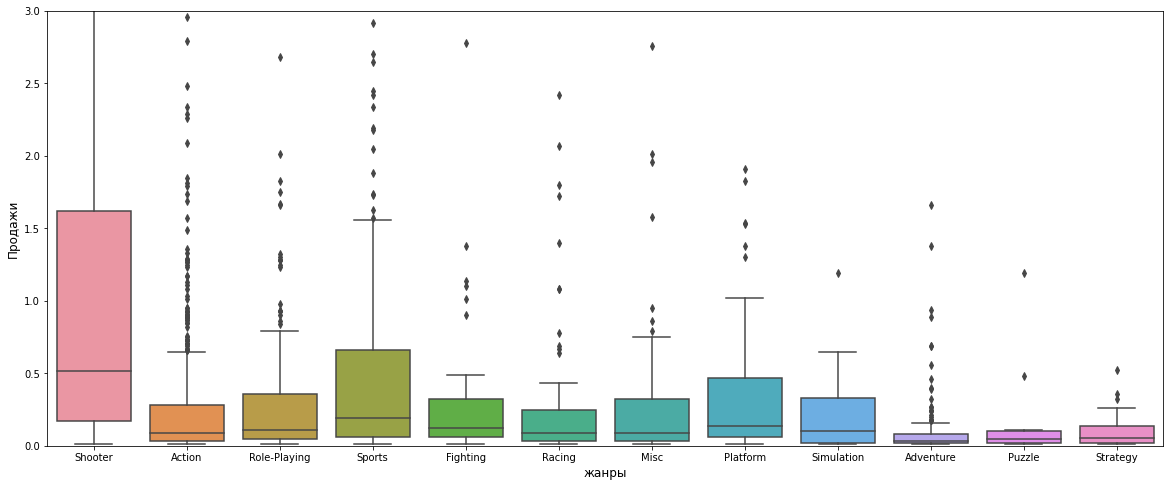

In [44]:
ax = plt.subplots(figsize=(20, 8))
ax = sb.boxplot( y=data_actual_platforms['total_sales'],x= data_actual_platforms['genre'], orient='v')
plt.ylabel('Продажи', size=12)
plt.xlabel('жанры', size=12)
plt.show()

axx = plt.subplots(figsize=(20, 8))
axx = sb.boxplot( y=data_actual_platforms['total_sales'],x= data_actual_platforms['genre'], orient='v')
axx = plt.ylim(0, 3)
plt.ylabel('Продажи', size=12)
plt.xlabel('жанры', size=12)
plt.show()

## Conclusion

In this section, data were obtained on the number of games released on different platforms in different years. It was noted that with the advent of the PlayStation, platforms with significantly more significant levels of sales have become, the number of platforms has become larger and the number of games released has increased significantly.

The largest sales were recorded at the PS2 platform, however, by 2011, sales had come to naught due to the release of the new generation platform. The available data allow us to conclude that the average life expectancy of a platform is about 11 years. PC can be considered a special exception here. A platform that has a stable income for decades.

A study of the decade from 2007 to 2016 showed that the life cycle of such large platforms as DS, PS3, PSV, X360 has come to an end and the sales level will not grow. At the same time, it is worth paying attention to the PS4 platform, which is just beginning its life cycle and, obviously, the level of sales will grow. By analogy, one can predict the growth in sales of games for Xone, however, this platform did not show a strong start and one should not expect explosive growth in the future.

Span charts for the platforms of the past decade have been examined and it can be seen that the Wii platform has had very high sales, although the median and scatter are not high.

The study of the dependence of critics' and players' ratings on the level of sales did not give direct patterns, however, it can be noted that games with low ratings from critics often do not have a high level of sales. At the same time, the relationship between the ratings of players and critics is average.

Among the popular genres, it is worth highlighting "Action". The level of sales of games in this genre significantly exceeds the levels of sales of games in other genres. At the same time, games of the "Shooter" genre have the highest median value, we separately note the "Sports" and "Fighting" genres, which also have high median values.

The genres with the lowest sales were "Adventure", "Puzzle" and "Strategy".

# Step. User portrait of each region

At this stage, the most popular platforms and genres for each region will be determined (NA, EU, JP)

In [45]:
def rating_cat (row):
    rating = row['rating']
    if rating == 'E':
        return 6
    elif rating == 'M':
        return 17
    elif rating == 'T':
        return 13
    elif rating == 'E10+':
        return 10
    elif rating == 'K-A':
        return 6
    elif rating == 'AO':
        return 18
    elif rating == 'EC':
        return 0
data.insert(11, 'rating_cat', data.apply(rating_cat, axis = 1))

In [46]:
def pies(sales,text):
    '''
    This function builds two pie charts and two tables with the top 5 platforms and genres within the specified region.
     sales - region name (variable)
     text - the name of the region for the function title
    '''
    print('Регион:', text)
    print()
    full = data_actual_platforms.groupby('platform')[sales].sum().sort_values(ascending = False)
    other = pd.DataFrame([full.sum()- full.head(5).sum()], index = ['other'])
    pl = data_actual_platforms.groupby('platform')[sales].sum().sort_values(ascending = False).head(5)
    pl = pd.concat([pl, other])
    print('Топ-5 популярных платформ')
    display(pl.head())

    pl.plot(kind='pie', autopct="%.1f",fontsize = 14,subplots = True, figsize = (9, 9))
    plt.title('Распределение долей продаж по платформам в регионе')
    plt.ylabel('')
    plt.show()    
    
    #####
    
    full = data_actual_platforms.groupby('genre')[sales].sum().sort_values(ascending = False)
    other = pd.DataFrame([full.sum()- full.head(5).sum()], index = ['other'])
    pl = data_actual_platforms.groupby('genre')[sales].sum().sort_values(ascending = False).head(5)
    pl = pd.concat([pl, other])
    print('Топ-5 популярных жанров')
    display(pl.head())

    pl.plot(kind='pie', autopct="%.1f",fontsize = 14,subplots = True, figsize = (9, 9))
    plt.title('Распределение долей продаж по жанрам в регионе')
    plt.ylabel('')
    plt.show()
    
    print()
    print('Связь между рейтингом и продажами игр в регионе')
    ax= data_actual_platforms.plot.scatter(x = 'rating_cat', y = sales, alpha = .1)
    plt.ylabel('продажи', size=14)
    plt.xlabel('рейтинг игры', size=14)
    plt.show()


Распределение ТОП-5 платформ по регионам


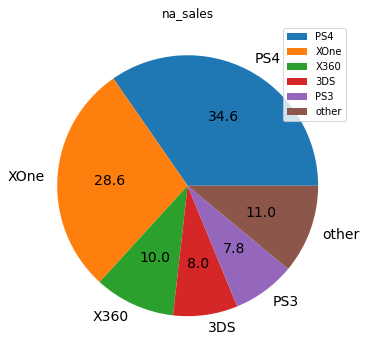

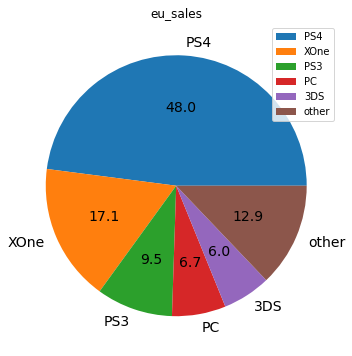

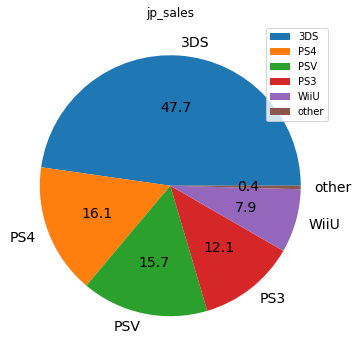

In [47]:
sales = ['na_sales','eu_sales','jp_sales']
print('Распределение ТОП-5 платформ по регионам')
for sale in sales:
    full = data_actual_platforms.groupby('platform')[sale].sum().sort_values(ascending = False)
    other = pd.DataFrame([full.sum()- full.head(5).sum()], index = ['other'])
    pl = data_actual_platforms.groupby('platform')[sale].sum().sort_values(ascending = False).head(5)
    pl = pd.concat([pl, other])

    pl.plot(kind='pie', autopct="%.1f",fontsize = 14,subplots = True, figsize = (6, 6))
    plt.title(sale)
    plt.ylabel('')
    plt.show()
    print()

Based on the data obtained, we can say that the most common platform in North America and Europe is PS4, and in Europe the share of sales tends to 50%, while in Japan the most popular platform is 3DS, whose share is about 50%.

Распределение ТОП-5 жанров по регионам


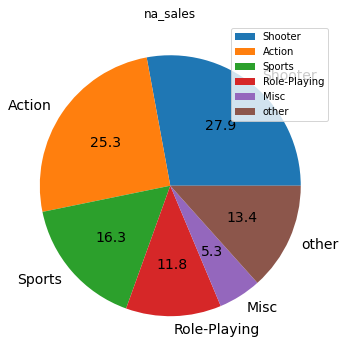

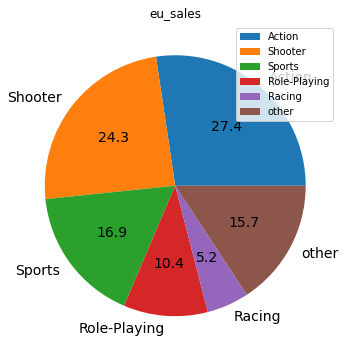

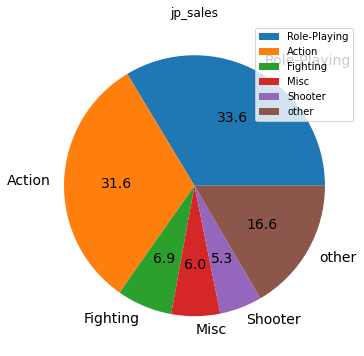

In [48]:
print('Распределение ТОП-5 жанров по регионам')
for sale in sales:
    full = data_actual_platforms.groupby('genre')[sale].sum().sort_values(ascending = False)
    other = pd.DataFrame([full.sum()- full.head(5).sum()], index = ['other'])
    pl = data_actual_platforms.groupby('genre')[sale].sum().sort_values(ascending = False).head(5)
    pl = pd.concat([pl, other])

    pl.plot(kind='pie', autopct="%.1f",fontsize = 14,subplots = True, figsize = (6, 6))
    plt.title(sale)
    plt.ylabel('')
    plt.show()

Based on the data obtained, we can say that the 'Action' genre is popular in each of the regions considered. At the same time, the 'Role-Playing' genre is popular in Japan, the popularity of which in North America and Europe is three times less.

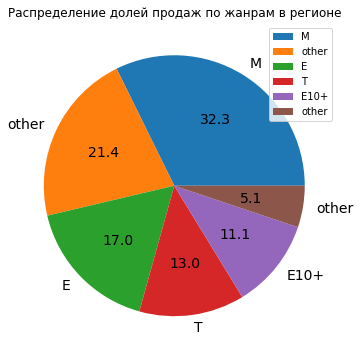

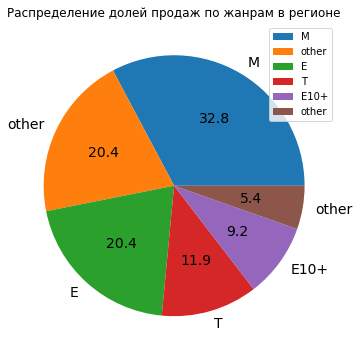

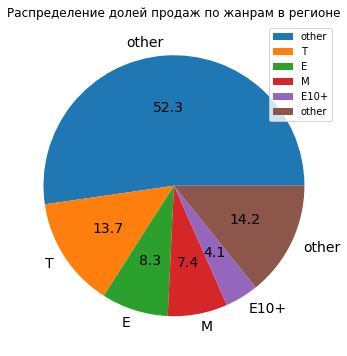

In [49]:
for sale in sales:
    pl = data_actual_platforms.groupby('rating')[sale].sum().sort_values(ascending = False).head(5)
    pl = pd.concat([pl, other])
    pl.plot(kind='pie', autopct="%.1f",fontsize = 14,subplots = True, figsize = (6, 6))
    plt.title('Распределение долей продаж по жанрам в регионе')
    plt.ylabel('')
    plt.show()


In this section, it can be noted that the most popular games in Europe and America are rated M (17+), while the share of games without a rating is about 20%. While in Japan the share of unrated games is more than 52%, and among the games that are rated, the most popular is T (13+)

## Conclusion

In this section, the specifics of the regions "North America", "Europe" and "Japan" were studied.

The available data suggests that the preferences of players from Japan are very different from those of American and European users.

We can say that players from Europe and America are in many ways similar in their choice of platforms and genres.

# Step. Hypothesis testing.

In this section, hypotheses will be formulated and tested:
- The average user ratings of the Xbox One and PC platforms are the same,
- Average user ratings for Action and Sports genres are different.

## First hypothesis about the average user ratings of the Xbox One and PC platforms

We formulate the first null hypothesis:

The average user ratings of the Xbox One and PC platforms are the same.

The alternative hypothesis is: The average user ratings of the Xbox One and PC platforms are different.

The critical level of statistical significance will be set as 0.05 for all studies.

It is generally accepted that the null hypothesis is formulated with an equals sign.
Python has a special method for testing the hypothesis that the mean of two populations is equal based on samples taken from them: scipy.stats.ttest_ind(sample_1, sample_2,equal_var). We apply the method in this study.

In [51]:
sample_1 = data.loc[data['platform'] == 'XOne']['user_score'].dropna()
sample_2 = data.loc[data['platform'] == 'PC']['user_score'].dropna()

In [52]:
r1 =sample_1.describe()
r1[1] = round(r1[1],1)
r1[2] = round(r1[2],1)

r2 =sample_2.describe()
r2[1] = round(r2[1],1)
r2[2] = round(r2[2],1)

r0= ['count','mean', 'std','min','25%','50%','75%','max']

In [53]:
alpha = .05

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



p-value:  9.93754837926613e-06
Отвергаем нулевую гипотезу


The null hypothesis was not confirmed, therefore we will accept the alternative hypothesis that the average user ratings of the Xbox One platforms are different for PC. Let's study the average values for the two platforms.

In [54]:
print('     ','XOne','    ','PC')
for t in zip(r0, r1, r2):
    print (t[0], ' ' ,t[1],'    ',t[2])

      XOne      PC
count   182.0      762.0
mean   6.5      7.1
std   1.4      1.5
min   1.6      1.4
25%   5.8      6.2
50%   6.8      7.5
75%   7.5      8.2
max   9.2      9.3


The available sample does not allow us to say for which platform the user ratings are higher, however, with a high degree of probability it can be argued that for the general population, the user ratings of the two platforms differ.

## Second hypothesis about the average user ratings of Action and Sports genres

We formulate the second null hypothesis:

The average user ratings for the Action and Sports genres are the same.


The alternative hypothesis is: The average user ratings of the Action and Sports genres are different.

The critical level of statistical significance will be set as 0.05

In [55]:
sample_3 = data.loc[data['genre'] == 'Action']['user_score'].dropna()
sample_4 = data.loc[data['genre'] == 'Sports']['user_score'].dropna()

In [56]:
alpha = .05

results = st.ttest_ind(
    sample_3, 
    sample_4,
    equal_var = True)

print('p-value: ', results.pvalue )

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")




p-value:  0.06614643201209211
Не получилось отвергнуть нулевую гипотезу


The data obtained do not allow us to reject the null hypothesis, so we will further assume that the user ratings of "Action" and "Sports" are the same.

# Step. Final conclusion

This study was prepared for the Strimchik online store in order to identify patterns that determine the success of the game.
At the heart of the study is the "games.csv" table, which stores 16,715 entries about games.
This table has 11 columns, namely:
- Name of the game,
- The platform on which this game was released,
- year of release,
- game genre,
- Number of copies sold in North America,
- Number of copies sold in Europe,
- Number of copies sold in Japan,
- Number of copies sold in other regions,
- Critics' ratings,
- User ratings,
- ESRB rating

The table has gaps in different columns and it is not possible to fill in all the gaps, however, during the preprocessing of data from open sources, the release years of games with the highest sales, with high critical acclaim and high player scores were obtained and filled in.

The exploratory data analysis phase looked at tables showing the number of games released by year and platform, and then by the number of copies sold. Using these tables, you can determine on which platforms games will be released in 2017 and their approximate number, as well as predict the number of sales by platform.

However, for a more detailed and detailed answer to the question of identifying potentially the most popular products, it is important to study the total indicators for all platforms.
It is clear that over the period from 1977 to 2016, the largest sales in million copies were shown by platforms such as:
* Nintendo DS (DS), 806 million copies sold.
* Play Station (PS), 731 million copies sold.
* Play Station 2 (PS2), 1256 million copies sold.
* Play Station 3 (PS3), 940 million copies sold.
* Wii, 908 million copies sold.
* Xbox 360 (X360), 971 million sold.

Note that by 2016, sales of games on these platforms are negligible.

To determine the relevant platforms, a time interval of 10 years was allocated and sales over the past few years were studied. One can single out the rise of platforms like the PS4 and XOne. Separately, it can be noted that games on the PC have a stable interest from the players and we can confidently say that this interest in this platform will continue.

In the following scatterplots, you can see that the Wii platform has such a significant sales level due to a few games, while the Play Station 2 has a high sales level due to a large number of games.

The relationship between user ratings, critics' ratings, and sales levels was further explored. It was found that there is no linear relationship between sales and ratings, however, it is important to note that games with high sales do not have low ratings from critics.

A study of the distribution of games by genre showed that "Action" can be considered the most popular genre by a significant margin. Another genre that shows a high level of sales can be considered the "Sports" genre.
At the same time, the lowest income genres are "Adventure", "Puzzle" and "Strategy".

Then, the preferences of users from different regions were studied. It was found that the preferences of users from North America and Europe are generally similar. The most popular are the same platforms, namely Xbox360, PlayStation of different generations and Wii, and the most popular genres are "Action", "Sports" and "Shooter".

At the same time, the games with the highest sales have a rating of 17+ and 6+. At the same time, the weakest sales show games 18+

At the same time, users from Japan prefer platforms such as DS, PS, PS2, SNES, 3DS, which already indicates a large difference in preferences, then the most popular genre is "Role-Playing" and only then "Action" and " Sports".
At the same time, sales of games with different age restrictions are distributed more evenly, although the highest sales are still in the 6+ rating, and the smallest - in the 18+ rating.

Next, two hypotheses were formulated and tested.
The first hypothesis is that the average user ratings across the Xbox One and PC platforms are equal. However, this hypothesis was not confirmed. Although it is impossible to say which platform's ratings are higher based on the available sample, with a fairly high degree of probability, it can be argued that they are not equal.

The second hypothesis says that the average user ratings of the Action and Sports genres are the same. It is not possible to refute this hypothesis on the basis of the available sample.

In this study, various aspects were studied that may affect the sales of games in the Strimchik store. The study identified both the most popular platforms and platforms that will increase sales. The best-selling genres and ratings by region were highlighted.